In [30]:
import pandas as pd

# Load the dataset
data = pd.read_csv("Resturent_Pizza.csv")

def calculate_dynamic_price(row):
    dynamic_price = row['Avg_Price']  # Start with the average price

    # Adjust price based on order time
    if int(row['order_time'].split(':')[0]) >= 17 and int(row['order_time'].split(':')[0]) <= 21:
        dynamic_price *= 1.1  # Increase price by 10% during dinner time (5 PM to 9 PM)

    # Adjust price based on location
    location_factors = {'Kolkata': 1.05, 'Gujarat': 1.08, 'Channai': 1.07, 'Mumbai': 1.06, 'Delhi': 1.1}
    if row['Location'] in location_factors:
        dynamic_price *= location_factors[row['Location']]

    # Adjust price based on order quantity
    if row['Quantity'] >= 2:
        dynamic_price *= 0.95  # Apply a 5% discount for orders of 2 or more pizzas
    elif row['Quantity'] >= 5:
        dynamic_price *= 0.9  # Apply a 10% discount for orders of 5 or more pizzas

    # Adjust price based on pizza size
    size_factors = {'L': 1.14, 'M': 1.13, 'S': 1.0}  # Adjust these factors as needed
    if row['pizza_size'] in size_factors:
        dynamic_price *= size_factors[row['pizza_size']]

    return dynamic_price


# Apply dynamic pricing logic to the dataset
data['Dynamic_Price'] = data.apply(calculate_dynamic_price, axis=1)

# Now, 'Dynamic_Price' column contains the dynamically adjusted prices
data['Dynamic_Price'] = data.apply(calculate_dynamic_price, axis=1)

print(data[data["Location"] == "Gujarat"])

# # Save the dataset with dynamically adjusted prices to an Excel file
# data.to_excel("dynamic_pricing_data.xlsx", index=False)


       Transaction_ID  order_id       pizza_id  Quantity  order_date  \
23              16684        10     mexicana_l         2    1/1/2015   
24              16684        10   southw_ckn_l         1    1/1/2015   
25              16688        11      bbq_ckn_l         1    1/1/2015   
26              16689        11     cali_ckn_l         1    1/1/2015   
28              16712        11    pepperoni_l         1    1/1/2015   
...               ...       ...            ...       ...         ...   
48615           40057     21348  ckn_alfredo_m         1  12/31/2015   
48616           40058     21348  four_cheese_l         1  12/31/2015   
48617           40062     21348   napolitana_s         1  12/31/2015   
48618           40066     21349     mexicana_l         2  12/31/2015   
48619           42069     21350      bbq_ckn_s         1  12/31/2015   

      order_time  GST  Discount_pct pizza_size pizza_category  \
23      13:00:15  0.1          10.0          L         Veggie   
24   

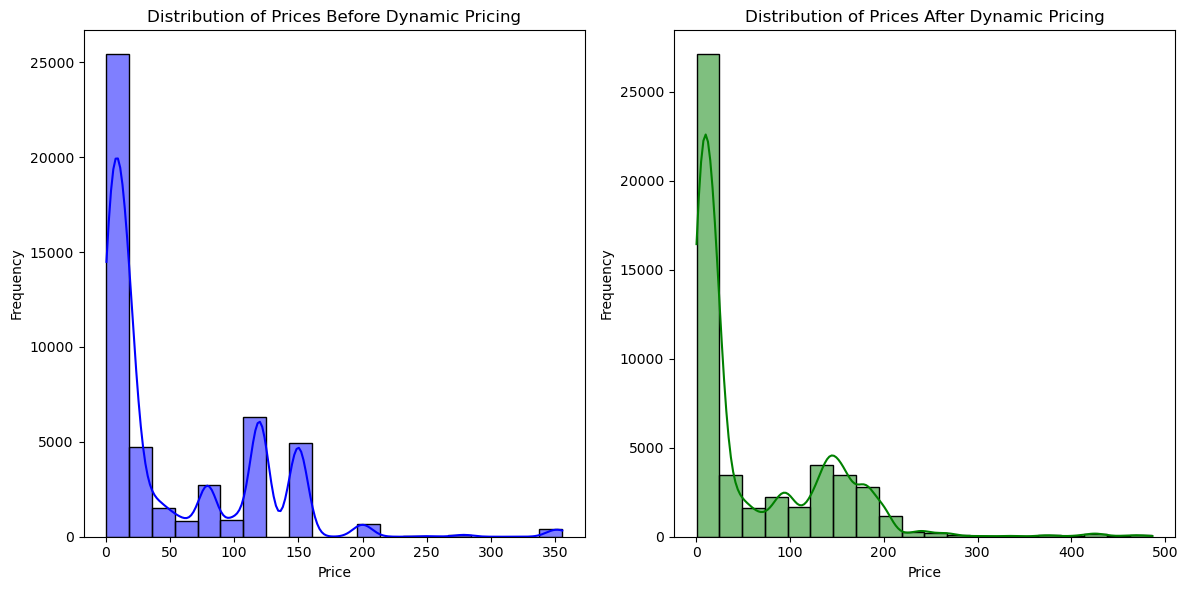

Total Revenue Before Dynamic Pricing: $4349034.26
Total Revenue After Dynamic Pricing: $5145438.75
Revenue Change: $796404.49


In [23]:
# Calculate total revenue before and after dynamic pricing
total_revenue_before = (data['Avg_Price'] * data['Quantity']).sum()
total_revenue_after = (data['Dynamic_Price'] * data['Quantity']).sum()
revenue_change = total_revenue_after - total_revenue_before

# Plot histograms to compare prices before and after dynamic pricing
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(data['Avg_Price'], bins=20, kde=True, color='blue')
plt.title('Distribution of Prices Before Dynamic Pricing')
plt.xlabel('Price')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
sns.histplot(data['Dynamic_Price'], bins=20, kde=True, color='green')
plt.title('Distribution of Prices After Dynamic Pricing')
plt.xlabel('Price')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Print total revenue before and after dynamic pricing
print(f'Total Revenue Before Dynamic Pricing: ${total_revenue_before:.2f}')
print(f'Total Revenue After Dynamic Pricing: ${total_revenue_after:.2f}')
print(f'Revenue Change: ${revenue_change:.2f}')

In [36]:
print(data['pizza_name'].count)

False
